Dataset features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Dataset shape: (150, 4)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------ 

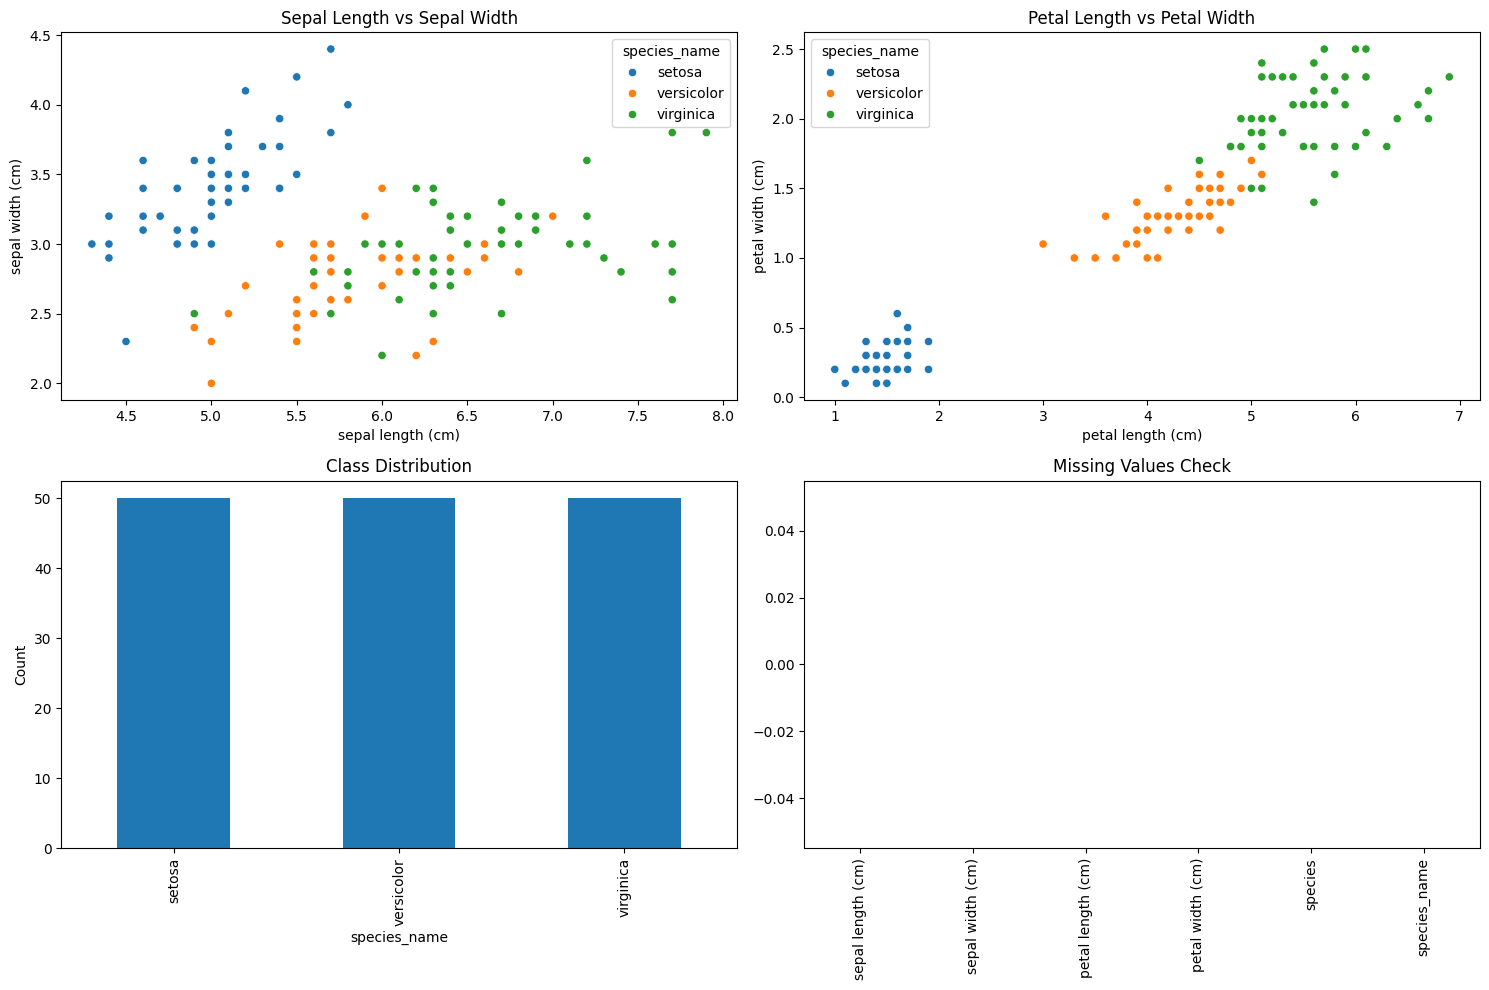

Training set size: 120
Testing set size: 30
Number of features: 4
Training completed!
Prediction probabilities for first 5 test samples:
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
=== MODEL EVALUATION ===
Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667

=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

=== CONFUSION MATRIX ===


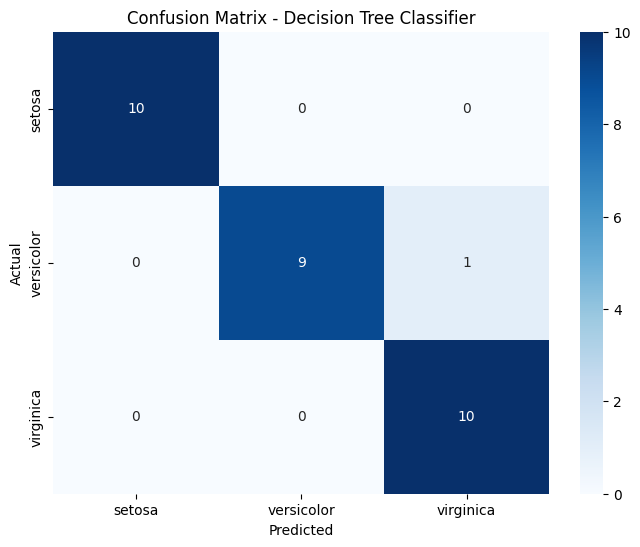

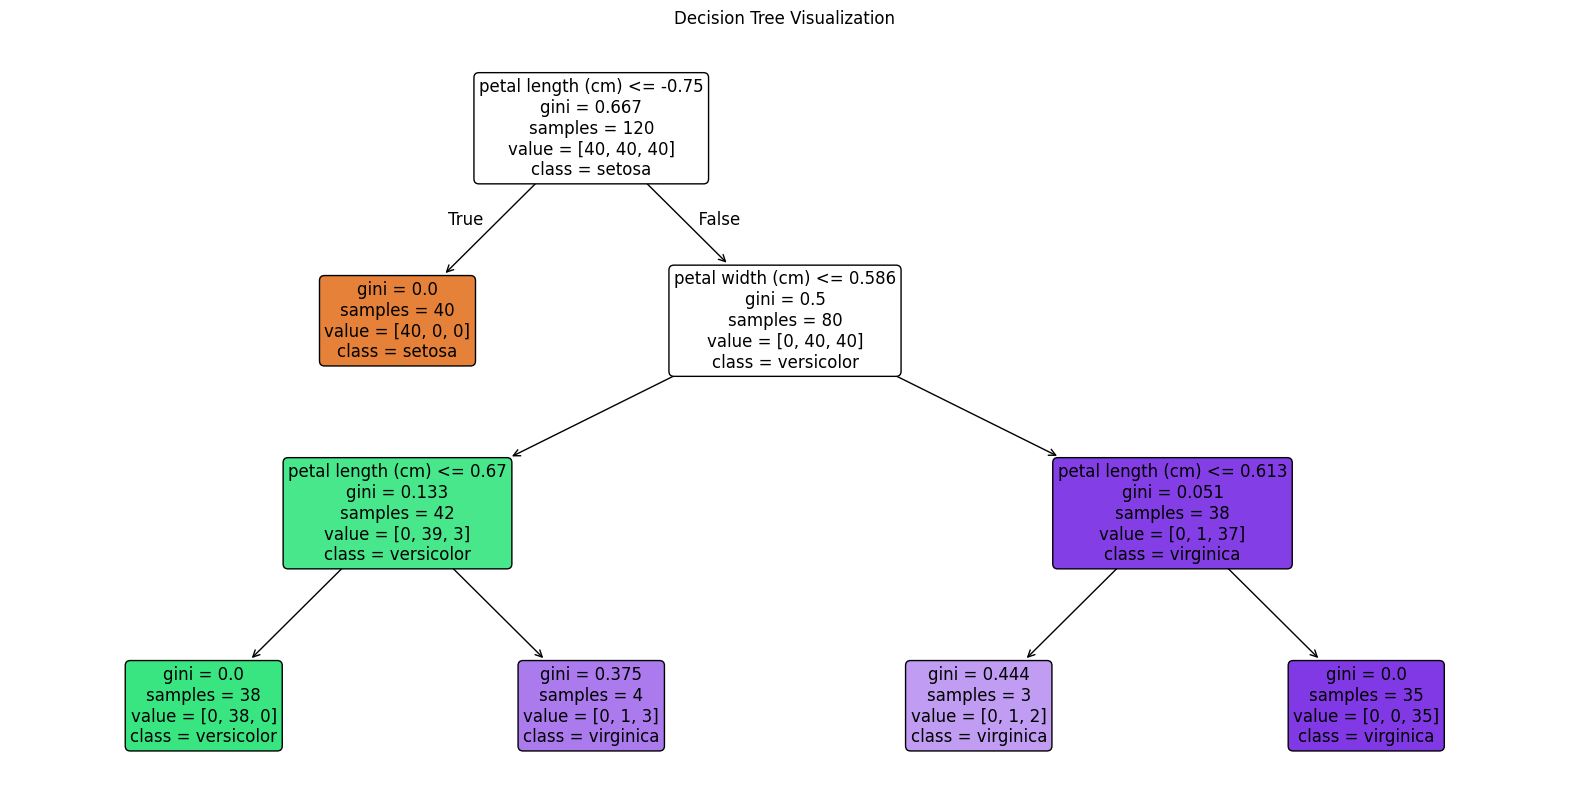

=== INDIVIDUAL PREDICTIONS ===
Sample 0:
  Features: [4.4 3.  1.3 0.2]
  Actual: setosa
  Predicted: setosa
  Correct: True

Sample 25:
  Features: [6.7 3.  5.  1.7]
  Actual: versicolor
  Predicted: virginica
  Correct: False



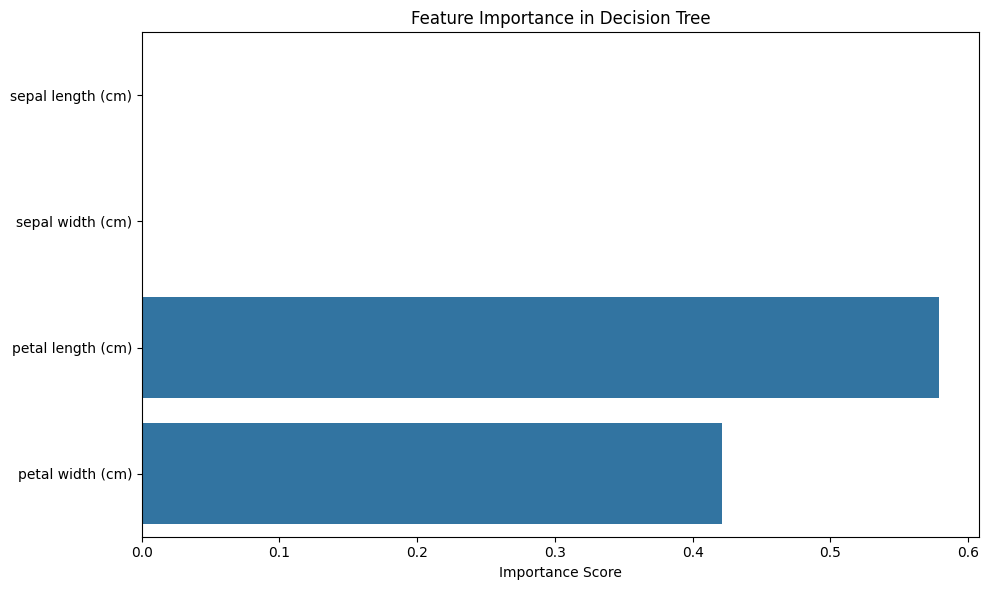

Feature importance scores:
  sepal length (cm): 0.0000
  sepal width (cm): 0.0000
  petal length (cm): 0.5791
  petal width (cm): 0.4209
🚀 Starting Iris Classification Task...


In [ ]:
"""
Iris Species Classification using Decision Trees
Author: [Lebo Maria]
Date: [16/10/2025]

This script demonstrates:
1. Data loading and exploration
2. Data preprocessing and splitting
3. Decision Tree classifier training
4. Model evaluation and visualization
"""

# [Copy all the code above here]

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Load the Iris dataset
iris = load_iris()
print("Dataset features:", iris.feature_names)
print("Target names:", iris.target_names)
print("Dataset shape:", iris.data.shape)

# Create a DataFrame for better visualization
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Basic statistics
print("\nDataset info:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

# Visualize the data distribution
plt.figure(figsize=(15, 10))

# Pairplot to see relationships between features
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species_name')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species_name')
plt.title('Petal Length vs Petal Width')

plt.subplot(2, 2, 3)
df['species_name'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
# Check for missing values
missing_data = df.isnull().sum()
missing_data.plot(kind='bar')
plt.title('Missing Values Check')

plt.tight_layout()
plt.show()

# Split features and target
X = iris.data  # Features
y = iris.target  # Target labels

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (important for many ML algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=3  # Limit tree depth to prevent overfitting
)

# Train the model
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test_scaled)
y_pred_proba = dt_classifier.predict_proba(X_test_scaled)

print("Training completed!")
print("Prediction probabilities for first 5 test samples:")
print(y_pred_proba[:5])

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("=== MODEL EVALUATION ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Detailed classification report
print("\n=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
print("=== CONFUSION MATRIX ===")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()

# Test the model on some individual samples
print("=== INDIVIDUAL PREDICTIONS ===")
sample_indices = [0, 25, 50, 75, 100]  # Various samples

for idx in sample_indices:
    if idx < len(X_test):
        actual = iris.target_names[y_test[idx]]
        prediction = iris.target_names[y_pred[idx]]
        features = X_test[idx]

        print(f"Sample {idx}:")
        print(f"  Features: {features}")
        print(f"  Actual: {actual}")
        print(f"  Predicted: {prediction}")
        print(f"  Correct: {actual == prediction}\n")

        # Analyze which features are most important
feature_importance = dt_classifier.feature_importances_
feature_names = iris.feature_names

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("Feature importance scores:")
for name, importance in zip(feature_names, feature_importance):
    print(f"  {name}: {importance:.4f}")

if __name__ == "__main__":
    print("🚀 Starting Iris Classification Task...")
    # The code will execute sequentially